I. PERKENALAN 

   Perkenalkan nama saya Al Izhar Iqrami biasa dipanggil Izhar. Saya merupakan salah satu student di Hacktive8 pada program Bootcamp Data Science Batch 011.

   Adapun gambaran besar data Pokemon ialah terdiri dari 13 kolom dan 799 baris yang berarti jumlah pokemon mencakup 721 jenis pokemon dengan nama yang berbeda.

   Berdasarkan data Pokemon ini saya tertarik ingin mengetahui :
   1. Pokomon terkuat dengan kriteria :
      - Total >= 600
      - nilai HP >= 50
      - nilai attack >= 150
      - nilai defense >= 100
      - nilai Speed >= 100
      - legendary = true
   2. Pokemon terlemah dengan kriteria :
      - Total <= 215
      - Nilai HP <= 35
      - Nilai attack <= 50
      - Nilai defense <= 35
      - Nilai Speed <= 50
      - Legendary = False


II. IMPORT PUSTAKA YANG DIBUTUHKAN 

In [3]:
import pandas as pd 
import numpy as np

III. DATA LOADING

Pada tahapan ini, saya ingin mengimport data dari komputer agar dapat terbaca dan diolah untuk mendapatkan 
sebuah informasi

In [4]:
df = pd.read_csv('Pokemon.csv')
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


IV. DATA CLEANING

Pada tahapan ini saya ingin menyalin data asli dengan nama "df_new" menggunakan perintah "df.copy" 
agar jika pada saat eksplorasi terdapat kesalahan, kita dapat dengan mudah mengembalikan kondisi data seperti semula
 

In [5]:
df_new = df.copy()
df_new

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


Pada tahapan ini saya ingin melihat kondisi data secara umum apakah terdapat data yang kosong atau tidak.
Setelah melakukan pengecekan dengan pertintah "df_new.info()" ternyata pada kolom "Type 2" terdapat
data yang kosong sebanyak 386 data.

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


Melihat lebih spesifik jumlah data yang Missing values

In [7]:
df_new.isnull().sum()   

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

IV.a Missing Values

Setelah melihat kondisi data secara umum, saya ingin menghapus kolom Typye 2 karena terdapat banyak data yang kosong

In [8]:
df_new.dropna(axis=1,inplace=True)

In [9]:
df_new

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,680,80,160,60,170,130,80,6,True


IV.b Manipulating Colums

Pada tahapan ini saya ingin mengganti nama kolom "#" menjadi "ID" dan "Type 1" menjadi "Type" agar 
data terlihat lebih rapi dan mudah untuk dimengerti

In [10]:
df_new = df_new.rename(
    columns={'#':'ID','Type 1': 'Type'})

In [11]:
df_new.head()

,ID,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False


V. Eksplorasi Data

V.a Grouping and Agregatting

Pada tahapan ini, sesuai dengan tujuan yang ingin saya lakukan yaitu mencari pokemon terkuat dengan kriteria:

- Total >= 600
- Nilai HP >= 50
- Nilai Attack >= 150
- Nilai Defense >= 100
- Nilai Speed >= 100
- Legendary = True

In [12]:

G1 = df_new[
    (df_new["Total"] >= 600) & 
    (df_new["HP"] >= 50) &
    (df_new["Attack"] >= 150) &
    (df_new["Defense"] >= 100) &
    (df_new["Speed"] >= 100) & 
    (df_new["Legendary"] == True)]
G1


,ID,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,780,106,190,100,154,100,130,1,True
426,384,RayquazaMega Rayquaza,Dragon,780,105,180,100,180,100,115,3,True
543,486,Regigigas,Normal,670,110,160,110,80,110,100,4,True
796,719,DiancieMega Diancie,Rock,700,50,160,110,160,110,110,6,True


In [13]:
G1.groupby(['Total','HP','Attack','Defense','Speed','Legendary'])['ID'].count()

Total  HP   Attack  Defense  Speed  Legendary
670    110  160     110      100    True         1
700    50   160     110      110    True         1
780    105  180     100      115    True         1
       106  190     100      130    True         1
Name: ID, dtype: int64

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10016/3912902547.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  G1.groupby('Name')['HP','Attack','Defense','Speed'].sum().plot(kind='bar',title='Grafik Perbandingan Nilai Pokemon Terkuat')


<AxesSubplot:title={'center':'Grafik Perbandingan Nilai Pokemon Terkuat'}, xlabel='Name'>

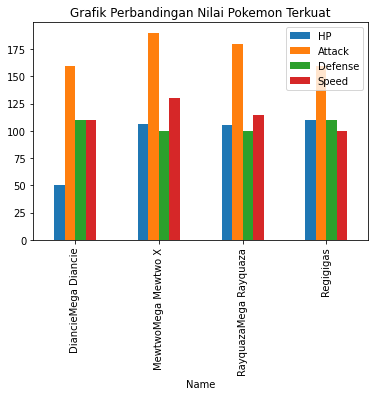

In [14]:
G1.groupby('Name')['HP','Attack','Defense','Speed'].sum().plot(kind='bar',title='Grafik Perbandingan Nilai Pokemon Terkuat')

Pada tahapan ini, sesuai dengan tujuan yang ingin saya lakukan yaitu mencari pokemon terlemah dengan kriteria:

- Total <= 215
- Nilai HP <= 35
- Nilai attack <= 50
- Nilai defense <= 35
- Nilai Speed <= 50
- Legendary = False

In [15]:
G2 = df_new[
    (df_new["Total"] <= 215) & 
    (df_new["HP"] <= 35) &
    (df_new["Attack"] <= 50) &
    (df_new["Defense"] <= 35) &
    (df_new["Speed"] <= 50) & 
    (df_new["Legendary"] == False)]
G2

,ID,Name,Type,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
175,161,Sentret,Normal,215,35,46,34,35,45,20,2,False
206,191,Sunkern,Grass,180,30,30,30,30,30,30,2,False
255,236,Tyrogue,Fighting,210,35,35,35,35,35,35,2,False
303,280,Ralts,Psychic,198,28,25,25,45,35,40,3,False


In [16]:
G2.groupby(['Total','HP','Attack','Defense','Speed','Legendary'])['ID'].count()

Total  HP  Attack  Defense  Speed  Legendary
180    30  30      30       30     False        1
198    28  25      25       40     False        1
210    35  35      35       35     False        1
215    35  46      34       20     False        1
Name: ID, dtype: int64

C:\Users\ASUS\AppData\Local\Temp/ipykernel_10016/1581672575.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  G2.groupby('Name')['HP','Attack','Defense','Speed'].sum().plot(kind='bar',title='Grafik Perbandingan Nilai Pokemon Terlemah')


<AxesSubplot:title={'center':'Grafik Perbandingan Nilai Pokemon Terlemah'}, xlabel='Name'>

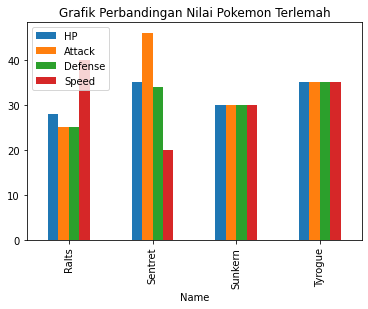

In [17]:
G2.groupby('Name')['HP','Attack','Defense','Speed'].sum().plot(kind='bar',title='Grafik Perbandingan Nilai Pokemon Terlemah')

Pada tahapan ini saya tertarik untuk melihat jumlah Type pokemon yang paling banyak dan juga yang paling sedikit.

In [18]:
Type = df_new['Type'].value_counts()
Type

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type, dtype: int64

<AxesSubplot:title={'center':'Grafik Jumlah Tipe Pokemon'}>

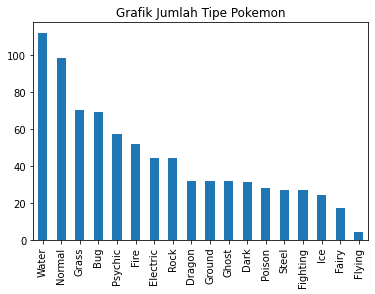

In [19]:
Type.plot(kind='bar', title ='Grafik Jumlah Tipe Pokemon')

 Tahapan ini saya tertarik untuk melihat perbandingan nilai Attack, Defense berdasarkan Speed untuk semua jenis pokemon

In [50]:
Perbandingan = df_new[['Attack','Defense','Speed']]
Perbandingan

,Attack,Defense,Speed
0,49,49,45
1,62,63,60
2,82,83,80
3,100,123,80
4,52,43,65
...,...,...,...
795,100,150,50
796,160,110,110
797,110,60,70
798,160,60,80


<AxesSubplot:xlabel='Attack', ylabel='Defense'>

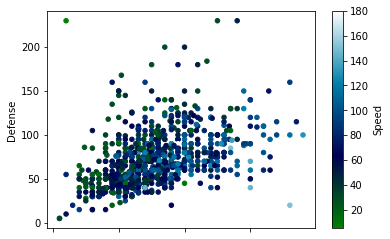

In [56]:
Perbandingan.plot.scatter(x='Attack',y='Defense',c='Speed',cmap='ocean')

VI. KESIMPULAN

Berdasarkan hasil analisis data diatas, maka diperoleh kesimpulan yaitu :
1. Berdasarkan kriteria yang telah ditetapkan, maka diperoleh pokemon terkuat dengan nama 
MewtwoMega Mewtwo X, RayquazaMega Rayquaza, Regigigas, dan DiancieMega Diancie. 
adapun pokemon yang terlemah ialah Sentret, Sunkern, Tyrogue dan Ralts.

2. Tipe pokemon yang paling banyak digunakan ialah Water dan yang paling sedikit digunakan ialah Flying